Epoch 1/5
293/293 [==============================] - 455s 2s/step - loss: 1.3502 - acc: 0.4824 - val_loss: 0.8633 - val_acc: 0.5127
Epoch 2/5
293/293 [==============================] - 454s 2s/step - loss: 0.8351 - acc: 0.5311 - val_loss: 0.8376 - val_acc: 0.5153
Epoch 3/5
293/293 [==============================] - 455s 2s/step - loss: 0.7957 - acc: 0.5600 - val_loss: 0.8316 - val_acc: 0.5162
Epoch 4/5
293/293 [==============================] - 460s 2s/step - loss: 0.7751 - acc: 0.5775 - val_loss: 0.8370 - val_acc: 0.5166
Epoch 5/5
782/782 [==============================] - 53s 67ms/step - loss: 0.8538 - acc: 0.5127
Evaluation result on Test Data : Loss = 0.854, accuracy = 0.513


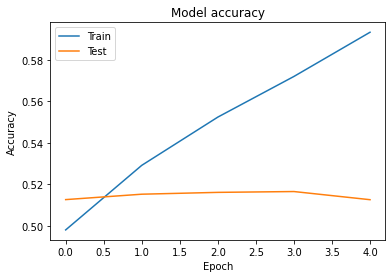

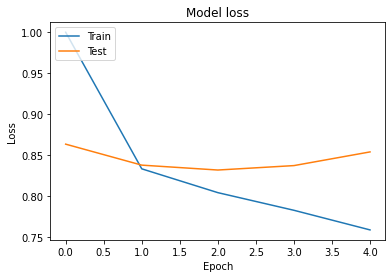

In [2]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.layers import Embedding, Flatten, Dense
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_master.csv',encoding='latin-1')
df.head()

sentences = df['review'].values
y = df['label'].values
max_review_len = max([len(s.split()) for s in sentences])

#tokenizing data
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

vocab_size = len(tokenizer.word_index)+1
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)
padded_docs = pad_sequences(sentences,maxlen=max_review_len)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

# Number of features
# print(input_dim)
model = Sequential()

model.add(Embedding(vocab_size, output_dim = 50, input_length=max_review_len))
model.add(Flatten())

model.add(layers.Dense(300, input_dim=max_review_len, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {:0.3f}, accuracy = {:0.3f}".format(test_loss, test_acc))




# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

